In [1]:
# @title data
import pandas as pd

data = pd.DataFrame({'pound in 1000s':[3.5,3.69,3.44,3.43,4.34,4.42,2.37],'gallon per mile':[18,15,18,16,15,14,24]})
data.head()

pound in 1000s  gallon per mile
0            3.50               18
1            3.69               15
2            3.44               18
3            3.43               16
4            4.34               15

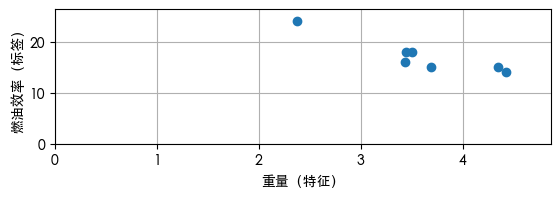

In [8]:
# @title 图像绘制
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['HeiTi TC']  # 用来正常显示中文标签

plt.scatter(data['pound in 1000s'],data['gallon per mile'])
plt.xlabel('重量（特征）')
plt.ylabel('燃油效率（标签）')

# 设置坐标轴范围
plt.xlim(0, np.max(data['pound in 1000s']) * 1.1)  # x轴从0到数据的最大值的110%
plt.ylim(0, np.max(data['gallon per mile']) * 1.1)   # y轴从0到数据的最大值的110%

# 设置坐标轴比例为1:10
plt.gca().set_aspect(1/20)  # y轴与x轴的比例为1:20
plt.grid(True)
plt.show()

In [94]:
# @title 定义图像

def make_plots(df, feature_names, label_name, model_output):
    cost = model_output['Cost']
    iter = model_output['Iteration']
    weight = model_output['Weights'][9999]
    bias = model_output['Bias'][9999]
    fig,ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(iter, cost)
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Cost')

    ax[1].plot(df[feature_names], df[label_name], 'bo', label='Training Data')
    x_values = np.linspace(df[feature_names].min(), df[feature_names].max(), 100)
    y_values = weight * x_values + bias
    ax[1].plot(x_values, y_values, 'r-', label='Regression Line')
    ax[1].set_xlim(0, np.max(data['pound in 1000s']) * 1.1)  # x轴从0到数据的最大值的110%
    ax[1].set_ylim(0, np.max(data['gallon per mile']) * 1.1)   # y轴从0到数据的最大值的110%
    ax[1].set_aspect(1/20)  # y轴与x轴的比例为1:20
    ax[1].legend()
    plt.show()





In [89]:
import numpy as np
import pandas as pd

# @title梯度下降过程
def gradient_descent(features, label, iterations, learning_rate):

    m = len(features)
    weights = np.zeros(len(features[0]))
    bias = 0
    output = pd.DataFrame(columns=['Iteration', 'Cost', 'Weights', 'Bias'])
    for i in range(iterations):
        predicted_values = np.dot(features, weights) + bias
        cost = (1/m) * np.sum(np.square(predicted_values - label))
        gradient_weights = (2/m) * np.sum(np.dot(features.T, predicted_values - label))
        gradient_bias = (2/m) * np.sum(predicted_values - label)
        weights = weights - learning_rate * gradient_weights
        bias = bias - learning_rate * gradient_bias
        print('Iteration {}: cost={}, weights={}, bias={}'.format(i+1, cost, weights, bias))
        output.loc[i] = [i+1, cost, weights, bias]
    return output

def run_experiment(df, feature_names, label_name, learning_rate, iterations):
    print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

    features = df[feature_names].values
    label = df[label_name].values
    model_output = gradient_descent(features, label, iterations, learning_rate)
    make_plots(df,feature_names, label_name,model_output)



INFO: starting training experiment with features=['pound in 1000s'] and label=gallon per mile

Iteration 1: cost=303.7142857142857, weights=[1.19717143], bias=0.34285714285714286
Iteration 2: cost=170.8431181914581, weights=[2.0500102], bias=0.5926950048979591
Iteration 3: cost=103.17402263230161, weights=[2.6571513], bias=0.7761560852914671
Iteration 4: cost=68.70278422397007, weights=[3.08897569], bias=0.9122511317638123
Iteration 5: cost=51.13435741865341, weights=[3.39570371], bias=1.0145452584284123
Iteration 6: cost=42.172069065705266, weights=[3.61317002], bias=1.0927178494102214
Iteration 7: cost=37.59164220071696, weights=[3.76694445], bias=1.1536756275392142
Iteration 8: cost=35.242273045356974, weights=[3.87527236], bias=1.2023468841330058
Iteration 9: cost=34.02887314387428, weights=[3.95117269], bias=1.2422482013845164
Iteration 10: cost=33.39387478100269, weights=[4.00393512], bias=1.2758888369263701
Iteration 11: cost=33.05339059856095, weights=[4.04018829], bias=1.30505

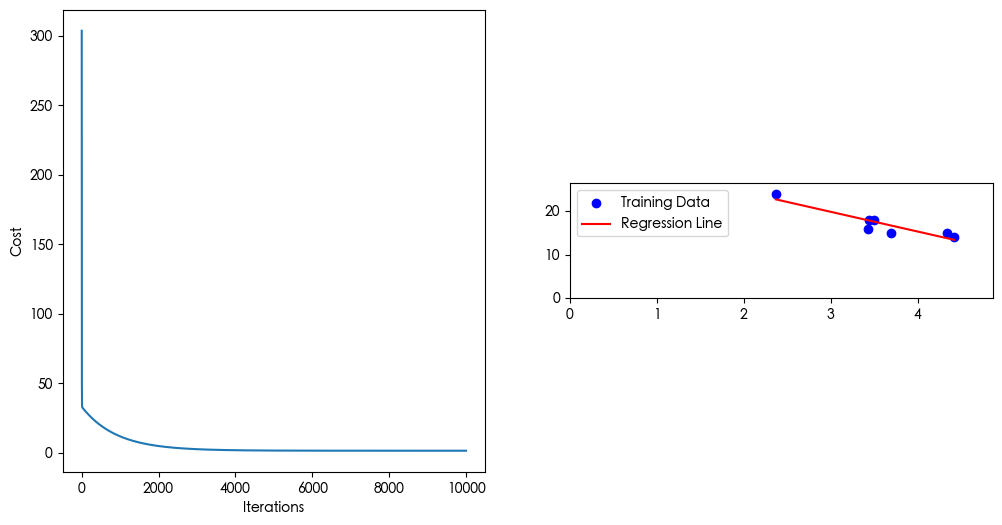

In [95]:
# @title 问题求解
learning_rate = 0.01
iterations = 10000

features = ['pound in 1000s']
label = 'gallon per mile'

model_1 = run_experiment(data, features, label, learning_rate, iterations)